# Credit Risk Resampling Techniques

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



# Read the CSV into DataFrame

In [3]:
# Load the data
file_path = Path('lending_data.csv')
df = pd.read_csv(file_path)
df.head(5)

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,own,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,own,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,rent,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,own,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,mortgage,53000,0.433962,5,1,23000,low_risk


In [4]:
# Label Encode X - homeowner

label_encoder = LabelEncoder()
label_encoder.fit(df["homeowner"])
list(label_encoder.classes_)
df["homeowner"] = label_encoder.transform(df["homeowner"])
df.head(5)


,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,1,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,1,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,2,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,1,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,0,53000,0.433962,5,1,23000,low_risk


In [5]:
# Label Encode y - loan_status

label_encoder = LabelEncoder()
label_encoder.fit(df["loan_status"])
list(label_encoder.classes_)
df["loan_status"] = label_encoder.transform(df["loan_status"])
df.head(5)

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,1,52800,0.431818,5,1,22800,1
1,8400.0,6.692,1,43600,0.311927,3,0,13600,1
2,9000.0,6.963,2,46100,0.349241,3,0,16100,1
3,10700.0,7.664,1,52700,0.430740,5,1,22700,1
4,10800.0,7.698,0,53000,0.433962,5,1,23000,1


# Split the Data into Training and Testing

In [6]:
# Create our features
# X =  YOUR CODE HERE

X = df.copy()
X.drop("loan_status", axis=1, inplace=True)
X.head(5)


,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,1,52800,0.431818,5,1,22800
1,8400.0,6.692,1,43600,0.311927,3,0,13600
2,9000.0,6.963,2,46100,0.349241,3,0,16100
3,10700.0,7.664,1,52700,0.430740,5,1,22700
4,10800.0,7.698,0,53000,0.433962,5,1,23000


In [7]:
# Create our target
#y =  YOUR CODE HERE

#y = df["loan_status"].ravel()
y = df["loan_status"]
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [8]:
X.describe()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,0.606144,49221.949804,0.377318,3.826610,0.392308,19221.949804
std,2093.223153,0.889495,0.667811,8371.635077,0.081519,1.904426,0.582086,8371.635077
min,5000.000000,5.250000,0.000000,30000.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,0.000000,44800.000000,0.330357,3.000000,0.000000,14800.000000
50%,9500.000000,7.172000,1.000000,48100.000000,0.376299,4.000000,0.000000,18100.000000
75%,10400.000000,7.528000,1.000000,51400.000000,0.416342,4.000000,1.000000,21400.000000
max,23800.000000,13.235000,2.000000,105200.000000,0.714829,16.000000,3.000000,75200.000000


In [9]:
y.head(5)


0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [10]:
df['homeowner'].value_counts()

0    38572
1    30930
2     8034
Name: homeowner, dtype: int64

In [11]:
type(y)

pandas.core.series.Series

In [12]:
# Check the balance of our target values
y.value_counts()

1    75036
0     2500
Name: loan_status, dtype: int64

In [13]:
# Create X_train, X_test, y_train, y_test
# YOUR CODE HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [14]:
X_train

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
29175,8600.0,6.792,1,44500,0.325843,3,0,14500
23020,7800.0,6.419,1,41000,0.268293,2,0,11000
31269,10000.0,7.386,1,50100,0.401198,4,1,20100
35479,9300.0,7.093,2,47300,0.365751,3,0,17300
13470,9200.0,7.045,1,46900,0.360341,3,0,16900
...,...,...,...,...,...,...,...,...
20609,7200.0,6.177,1,38700,0.224806,1,0,8700
21440,10000.0,7.389,1,50100,0.401198,4,1,20100
73349,10200.0,7.463,1,50800,0.409449,4,1,20800
50057,11100.0,7.838,0,54400,0.448529,5,1,24400


## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [15]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
# YOUR CODE HERE

scaler = StandardScaler()



In [16]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
# YOUR CODE HERE

X_scaler = scaler.fit(X_train)


In [19]:
X_scaler

StandardScaler()

In [20]:
# Scale the training and testing data
# YOUR CODE HERE

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [21]:
X_train_scaled

array([[-0.57708952, -0.56367666,  0.59196056, ..., -0.43489843,
        -0.67289855, -0.5652314 ],
       [-0.95927354, -0.98302549,  0.59196056, ..., -0.96014741,
        -0.67289855, -0.98332378],
       [ 0.09173251,  0.10413354,  0.59196056, ...,  0.09035056,
         1.04334691,  0.10371642],
       ...,
       [ 0.18727852,  0.19070153,  0.59196056, ...,  0.09035056,
         1.04334691,  0.18733489],
       [ 0.61723554,  0.61229888, -0.90595905, ...,  0.61559954,
         1.04334691,  0.61737277],
       [ 0.37837052,  0.3807014 ,  0.59196056, ...,  0.61559954,
         1.04334691,  0.37846284]])

In [22]:
type(X_train_scaled)

numpy.ndarray

# Simple Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [24]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9520479254722232

In [25]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  563,    56],
       [  102, 18663]])

In [26]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.91      0.99      0.88      0.95      0.90       619
          1       1.00      0.99      0.91      1.00      0.95      0.91     18765

avg / total       0.99      0.99      0.91      0.99      0.95      0.91     19384



# Oversampling

In this section, you will compare two oversampling algorithms to determine which algorithm results in the best performance. You will oversample the data using the naive random oversampling algorithm and the SMOTE algorithm. For each algorithm, be sure to complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

### Naive Random Oversampling

In [27]:
# Resample the training data with the RandomOversampler
# YOUR CODE HERE

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


# View the count of target classes with Counter
# YOUR CODE HERE

Counter(y_resampled)


Counter({1: 56271, 0: 56271})

In [28]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)


LogisticRegression(random_state=1)

In [30]:
# Display the confusion matrix
# YOUR CODE HERE


from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  615,     4],
       [  116, 18649]])

In [31]:
# Calculated the balanced accuracy score
# YOUR CODE HERE

from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)


0.9936781215845847

In [32]:
# Print the imbalanced classification report
# YOUR CODE HERE

from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.99      0.99      0.91      0.99      0.99       619
          1       1.00      0.99      0.99      1.00      0.99      0.99     18765

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384



### SMOTE Oversampling

In [33]:
# Resample the training data with SMOTE
# YOUR CODE HERE

from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(X_train, y_train)

# View the count of target classes with Counter
# YOUR CODE HERE

Counter(y_resampled)


Counter({1: 56271, 0: 56271})

In [35]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

In [36]:
# Calculated the balanced accuracy score
# YOUR CODE HERE

from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)


0.9936781215845847

In [37]:
# Display the confusion matrix
# YOUR CODE HERE


from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, y_pred)


array([[  615,     4],
       [  116, 18649]])

In [38]:
# Print the imbalanced classification report
# YOUR CODE HERE

from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))


                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.99      0.99      0.91      0.99      0.99       619
          1       1.00      0.99      0.99      1.00      0.99      0.99     18765

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384



# Undersampling

In this section, you will test an undersampling algorithm to determine which algorithm results in the best performance compared to the oversampling algorithms above. You will undersample the data using the Cluster Centroids algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [39]:
# Resample the data using the ClusterCentroids resampler
# YOUR CODE HERE

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# View the count of target classes with Counter
# YOUR CODE HERE


Counter(y_resampled)


Counter({0: 1881, 1: 1881})

In [40]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)


In [41]:
# Calculate the balanced accuracy score
# YOUR CODE HERE

from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)


0.9936781215845847

In [42]:
# Display the confusion matrix
# YOUR CODE HERE

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[  615,     4],
       [  116, 18649]])

In [43]:
# Print the imbalanced classification report
# YOUR CODE HERE

from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))


                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.99      0.99      0.91      0.99      0.99       619
          1       1.00      0.99      0.99      1.00      0.99      0.99     18765

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384



# Combination (Over and Under) Sampling

In this section, you will test a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above. You will resample the data using the SMOTEENN algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

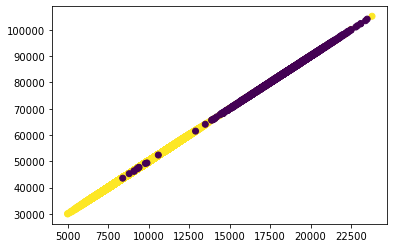

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X['loan_size'].values, X['borrower_income'].values, c=y)

In [56]:
# Resample the training data with SMOTEENN
# YOUR CODE HERE

from imblearn.combine import SMOTEENN

sm = SMOTEENN(random_state=1)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# View the count of target classes with Counter
# YOUR CODE HERE

Counter(y_resampled)


Counter({0: 55603, 1: 55948})

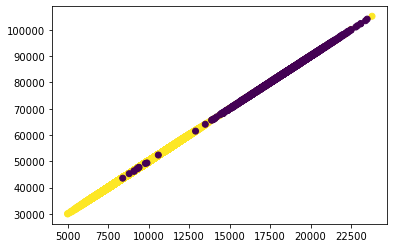

In [57]:
plt.scatter(X['loan_size'].values, X['borrower_income'].values, c=y)

In [58]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)


LogisticRegression(random_state=1)

In [59]:
# Calculate the balanced accuracy score
# YOUR CODE HERE

from sklearn.metrics import balanced_accuracy_score


y_pred = model.predict(X_test)

balanced_accuracy_score(y_test, y_pred)


0.9935182494822666

In [60]:
# Display the confusion matrix
# YOUR CODE HERE

from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, y_pred)


array([[  615,     4],
       [  122, 18643]])

In [61]:
# Print the imbalanced classification report
# YOUR CODE HERE

from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))


                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.99      0.99      0.91      0.99      0.99       619
          1       1.00      0.99      0.99      1.00      0.99      0.99     18765

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384



# Final Questions

1. Which model had the best balanced accuracy score?

   YOUR ANSWER HERE.

2. Which model had the best recall score?

    YOUR ANSWER HERE.

3. Which model had the best geometric mean score?

    YOUR ANSWER HERE.


In [ ]:
# Final Questions
# Which model had the best balanced accuracy score?

# YOUR ANSWER HERE.

# Which model had the best recall score?

# YOUR ANSWER HERE.

# Which model had the best geometric mean score?

# YOUR ANSWER HERE.